In [206]:
import pandas as pd
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [207]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [208]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')


In [209]:
data.duplicated().sum()
data.drop_duplicates(subset=None, keep='first', inplace=True)
# data.duplicated().sum()
# data.to_csv('prac2.csv')

In [210]:
cat_val = ['sex', 'smoker', 'region']
orig_val_sex = data.sex

In [211]:
data[cat_val] = data[cat_val].apply(LabelEncoder().fit_transform)
le_val_sex = data.sex

In [212]:
orig_sex_dic = np.unique(orig_val_sex)
le_sex_dic = np.unique(le_val_sex)
sex_dic = dict(zip(orig_sex_dic, le_sex_dic))
sex_dic

{'female': 0, 'male': 1}

In [213]:
# data.corr()['charges'].sort_values(ascending=False)

Text(0.5, 1.0, 'Correlation Table')

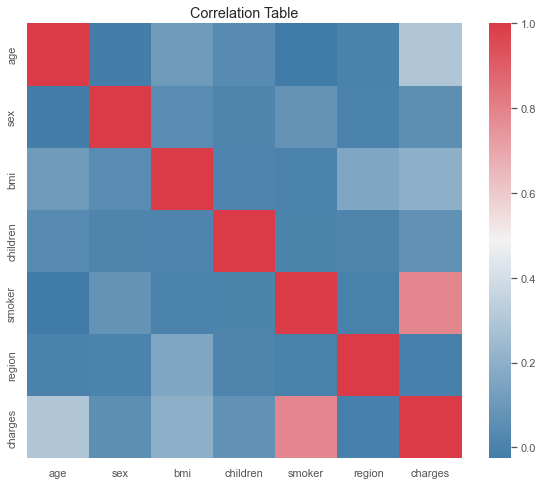

In [214]:
f,ax = plt.subplots(figsize=(10,8))
corr_data = data.corr()

sns.heatmap(corr_data, mask=np.zeros_like(corr_data, dtype=np.bool_), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)
ax.set_title('Correlation Table')

Text(0.5, 1.0, 'Men Charges ')

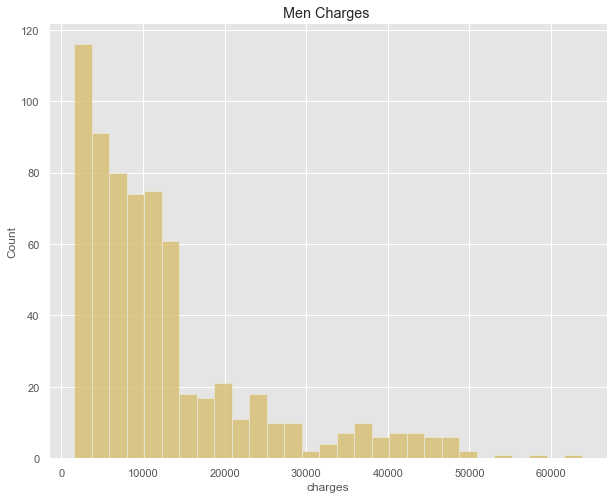

In [215]:
f,ax = plt.subplots(figsize=(10,8))

sns.histplot(data[(data.sex==0)]['charges'], color='y', ax=ax)

ax.set_title('Men Charges ')

In [216]:
X = data.drop(columns=['charges'], axis=1)
y = data.charges 


In [217]:
scaler = StandardScaler()
X =scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [218]:
x_train,x_test, y_train,y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [219]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [220]:
linreg_train_pred = linreg.predict(x_train)
linreg_test_pred = linreg.predict(x_test)

In [221]:
linreg_r2_train = r2_score(y_train, linreg_train_pred)
linreg_r2_test = r2_score(y_test, linreg_test_pred)

linreg_mse_train = mean_squared_error(y_train, linreg_train_pred)
linreg_mse_test = mean_squared_error(y_test, linreg_test_pred)

In [222]:
r2_perf_results = pd.DataFrame([ 
    'LinearRegression', linreg_r2_train, linreg_r2_test, linreg_mse_train, linreg_mse_test
]).transpose()

r2_perf_results.columns = ['Method', 'R2_Train', 'R2_Test', 'Mse_Train', 'Mse_Test']
r2_perf_results

,Method,R2_Train,R2_Test,Mse_Train,Mse_Test
0,LinearRegression,0.742396,0.763172,0.244325,0.264637


In [223]:
ran_forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0, n_jobs=-1)

ran_forest.fit(x_train, y_train)

ran_forest_train_pred = ran_forest.predict(x_train)
ran_forest_test_pred = ran_forest.predict(x_test)

mse_forest_train_pred = mean_squared_error(y_train, ran_forest_train_pred)
mse_forest_test_pred = mean_squared_error(y_test, ran_forest_test_pred)

r2_forest_train = r2_score(y_train, ran_forest_train_pred)
r2_forest_test = r2_score(y_test, ran_forest_test_pred)

C:\Users\amunv\AppData\Local\Temp\ipykernel_17904\3604017540.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [225]:
forest_mse_results = pd.DataFrame([ 
    'RandomForestRegressor', mse_forest_train_pred, mse_forest_test_pred, r2_forest_train, r2_forest_test
]).transpose()

forest_mse_results.columns = ['Method', 'MSE Train', 'MSE Test', 'R2_Train', 'R2_Test']
forest_mse_results

,Method,MSE Train,MSE Test,R2_Train,R2_Test
0,RandomForestRegressor,0.024357,0.165029,0.974319,0.852313
